In [1]:
import cv2
import xml
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

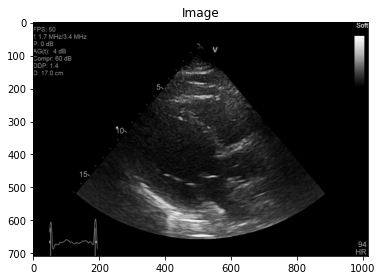

In [2]:
filename = "IM0_frame0.png"
img = cv2.imread(f"../../../../all_images/{filename}")

plt.figure(figsize=(6,6))
plt.title("Image")
plt.imshow(img);

In [3]:
annotations = xml.dom.minidom.parse("../../../../all_images/All images.xml")
img_annotations = [a for a in annotations.getElementsByTagName("image") if a.getAttribute("name") == filename].pop()
img_polygons = img_annotations.getElementsByTagName("polygon")

points = []
for polygon in img_polygons:
    points.append([eval(p) for p in polygon.getAttribute("points").split(';')])

f"{len(points)} annotated polygons"

'2 annotated polygons'

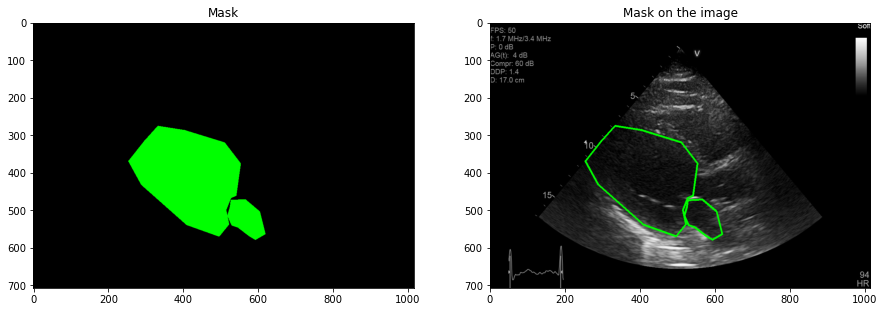

In [4]:
mask = np.zeros_like(img)
img_mask = img.copy()

for pts in points:
    cv2.fillConvexPoly(mask, np.array([pts]).astype(np.int), (0,255,0), 1)
    cv2.polylines(img_mask, np.array([pts]).astype(np.int), True, (0,255,0), 3)

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Mask")
plt.imshow(mask);
plt.subplot(1,2,2)
plt.title("Mask on the image")
plt.imshow(img_mask);